## Problem 1-1

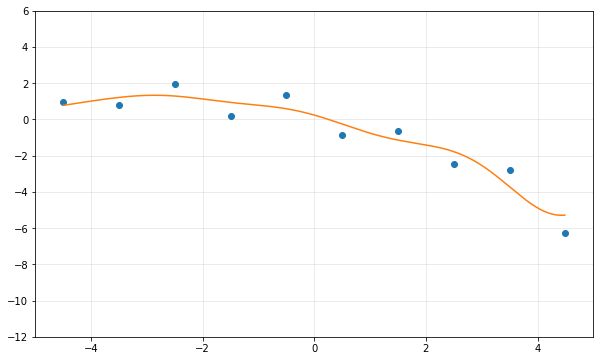

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10

u = np.linspace(-4.5, 4.5, d)
sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
lamb = 0.1

theta = inv(A.T*A + lamb*np.eye(d))*A.T*y
yp = rbfbasis*theta

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o')
plt.plot(xp, yp)
plt.grid(alpha=0.3)
plt.axis([-5, 5, -12, 6])
plt.show()

---------------------------------------------------------

## Problem 4

In [15]:
import matplotlib.pyplot as plt
from six.moves import cPickle

data = cPickle.load(open('C:/Users/Chris/workspace/UNIST/ML_2017-2/HW2/data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']

img = data0[1]

plt.imshow(img)

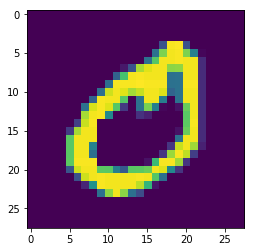

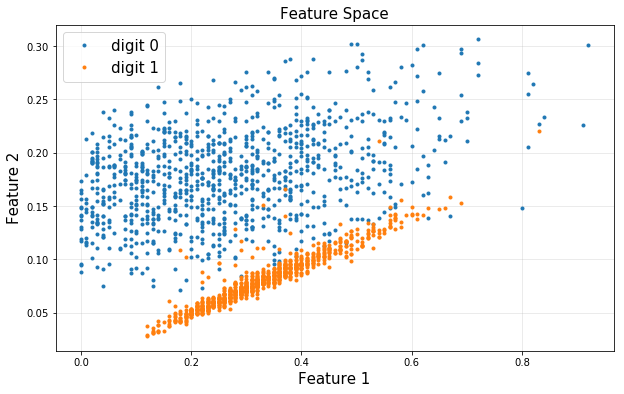

In [16]:
# Convert to binary image
data0 = data0 > 125
data1 = data1 > 125

# Average pixels locaed at the center of the image
feature0_1 = np.sum(data0[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100
feature1_1 = np.sum(data1[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100

# Total average pixels over the entire location
feature0_2 = np.sum(data0, axis=(1, 2)).reshape(-1, 1)/(28*28)
feature1_2 = np.sum(data1, axis=(1, 2)).reshape(-1, 1)/(28*28)

plt.figure(figsize=(10, 6))
plt.title('Feature Space', fontsize=15)
plt.plot(feature0_1, feature0_2, '.', label='digit 0')
plt.plot(feature1_1, feature1_2, '.', label='digit 1')
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()

-------------------------------------------------

## Problem 5

In [27]:
len(cp)

100

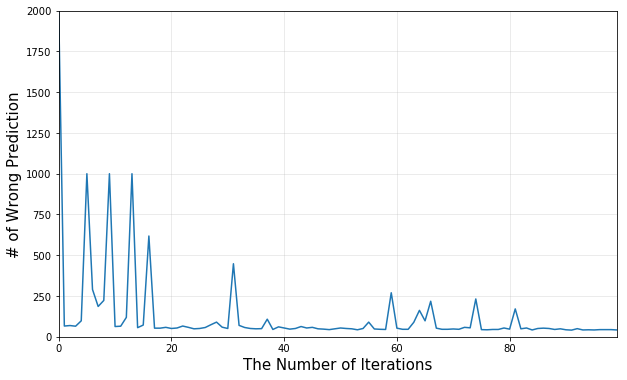

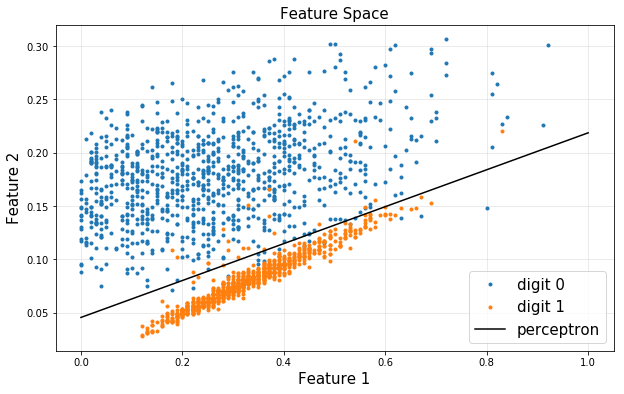

In [17]:
X0 = np.hstack([np.ones([data0.shape[0], 1]), feature0_1, feature0_2])
X1 = np.hstack([np.ones([data1.shape[0], 1]), feature1_1, feature1_2])
X = np.vstack([X0, X1])
X = np.asmatrix(X)

y = np.vstack([np.ones([1000, 1]), -np.ones([1000, 1])])
y = np.asmatrix(y)

# Initialize w
w = np.zeros([3, 1])
w = np.asmatrix(w)

cp = []

# 퍼셉트론 w update rule
n_iter = y.shape[0]
for k in range(100):
    cp.append(np.sum(np.sign(X*w) == y))
    for i in range(200):
        idx = np.random.randint(2000)
        if y[idx,0] != np.sign(X[idx,:]*w)[0,0]:
            w += y[idx,0]*X[idx,:].T

x1p = np.linspace(0,1).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(2000 - np.array(cp))
plt.xlabel('The Number of Iterations', fontsize=15)
plt.ylabel('# of Wrong Prediction', fontsize=15)
plt.axis([0, 99, 0, 2000])
plt.grid(alpha=0.3)

plt.figure(figsize=(10, 6))
plt.title('Feature Space', fontsize=15)
plt.plot(feature0_1, feature0_2, '.', label='digit 0')
plt.plot(feature1_1, feature1_2, '.', label='digit 1')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.plot()
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()